In [95]:
import helpers
import numpy as np
import re 

#helpers.npNicePrint(arr)

data = """0 1 10 99 999"""
#data = """125 17"""
with open("input_11.txt", 'r') as f:
    data = f.read()


def safe_get(grid, index):
    try:
        return grid[tuple(index)]
    except:
        return ""
    
#changeDict = {"forward": np.array([1,0]), "down": np.array([0,1]), "up": np.array([0,-1])}
#data = [changeDict[x.split(" ")[0]] * int(x.split(" ")[1]) for x in data.split("\n") if x]
#data = [
#    [int(match.group(1)), list(map(int, match.group(2).split()))]
#    for line in data.split("\n")
#    if (match := re.match(r'^(\d+):\s*(\d+(?:\s+\d+)*)', line))
#]
#np.prod(sum(data))    
#data = [list(map(int, x.split(" "))) for x in data.split('\n') if not x == ""]
#grid = {(x,y): int(val) for y, r in enumerate(data.split('\n')) for x, val in enumerate(r)}
#grid
data = [int(x) for x in data.split(" ")]


In [96]:
#0 - > 1 -> 2024 -> 20 24 -> 2 0 2 4
#2024
#4048
#6072
#8096
#20482880
#24579456
#28676032
#32772608
#36869184
from functools import lru_cache
#define dynamic programming approach with memoization via lru_cache
#Thought was that they would all return to single digits eventually, though that turned out to not be the case exactly
#each digit 0-1 is defined as a function of the other single digits it eventually changes into
#memoization caches the cases of these functions that are already computed, 
#e.g. num_1(3) will return num_0(0) + 2*num_2(0) + num_4(0) = 1 + 2 + 1 = 4 but instead of computing that whole recursion
#instead it will add them to an internal dictionary/hashmap and grab the computed value from there 
#like memo = dict({num_1(19): 2377}) num_0(20) = memo[num_1(19)] = 2377

#See lanternfish bonus method at the end for a simpler way to do it
 

@lru_cache(None)
def num_0(t):
    if t == 0:
        return 1
    else:
        return num_1(t-1)
#2024
@lru_cache(None)
def num_1(t):
    if t <= 1:
        return 1
    elif t == 2:
        return 2
    elif t >= 3:
        return num_0(t-3) + 2*num_2(t-3) + num_4(t-3) 
#4048    
@lru_cache(None)
def num_2(t):
    if t <= 1:
        return 1
    elif t == 2:
        return 2
    elif t >= 3:
        return num_0(t-3) + 2*num_4(t-3) + num_8(t-3) 
#6072    
@lru_cache(None)    
def num_3(t):
    if t <= 1:
        return 1
    elif t == 2:
        return 2
    elif t >= 3:
        return num_6(t-3) + num_0(t-3) + num_7(t-3) + num_2(t-3) 
#8096    
@lru_cache(None)
def num_4(t):
    if t <= 1:
        return 1
    elif t == 2:
        return 2
    elif t >= 3:
        return num_8(t-3) + num_0(t-3) + num_9(t-3) +  + num_6(t-3) 
#20482880    
@lru_cache(None)    
def num_5(t):
    if t <= 2:
        return 1
    elif t == 3:
        return 2
    elif t == 4:
        return 4
    elif t >= 5:
        return 2*num_0(t-5) + 2*num_2(t-5) + num_4(t-5) + 3*num_8(t-5)
#24579456    
@lru_cache(None)    
def num_6(t):
    if t <= 2:
        return 1
    elif t == 3:
        return 2
    elif t == 4:
        return 4
    elif t >= 5:
        return num_2(t-5) + 2*num_4(t-5) + 2*num_5(t-5) + num_6(t-5) + num_7(t-5) + num_9(t-5) 
@lru_cache(None)
#28676032
def num_7(t):
    if t <= 2:
        return 1
    elif t == 3:
        return 2
    elif t == 4:
        return 4
    elif t >= 5:
        return num_0(t-5) + 2*num_2(t-5) + num_3(t-5) + 2*num_6(t-5) + num_7(t-5) + num_8(t-5) 
    
#32772608 exception 08  
#3277 2608 
#32 77 26 8 
#3 2 7 7 2 6 
@lru_cache(None)    
def num_8(t):
    if t <= 2:
        return 1
    elif t == 3:
        return 2
    elif t == 4:
        return 4  # num_8(0) = 1 so can keep 4
    elif t >= 5:
        return 2*num_2(t-5) + num_3(t-5) + num_6(t-5) + 2*num_7(t-5) + num_8(t-4) #since 8 has a leading zero, it starts one earlier
#36869184    
@lru_cache(None)    
def num_9(t):
    if t <= 2:
        return 1
    elif t == 3:
        return 2
    elif t == 4:
        return 4
    elif t >= 5:
        return num_1(t-5) + num_3(t-5) + num_4(t-5) + 2*num_6(t-5) + 2*num_8(t-5) + num_9(t-5) 

In [97]:
def sum_num(x, t):
    if x > 9:
        print("error")
    if x == 0:
        return num_0(t)
    elif x == 1:
        return num_1(t)
    elif x == 2:
        return num_2(t)
    elif x == 3:
        return num_3(t)
    elif x == 4:
        return num_4(t)
    elif x == 5:
        return num_5(t)
    elif x == 6:
        return num_6(t)
    elif x == 7:
        return num_7(t)
    elif x == 8:
        return num_8(t)
    elif x == 9:
        return num_9(t)

In [98]:
def split_number_in_half(number):
    # Convert the number to a string
    num_str = str(number)
    # Find the middle index
    mid_index = len(num_str) // 2
    # Split the number into two halves
    first_half = int(num_str[:mid_index])
    second_half = int(num_str[mid_index:])
    return first_half, second_half

In [99]:
def larger_num(num, iterations = 25):
    ans = 0 
    num = [num]
    i = 0
    while i < iterations and len(num) > 0:
        #print(i)
        n_num = []
        #print(num)
        for n in num:
            if len(str(n)) == 1:
                #print(iterations - i)
                ans += sum_num(n, iterations - i)
                continue
            if not len(str(n)) % 2 == 0:
                n *= 2024
                n_num.append(n)
            else:
                n_1, n_2 = split_number_in_half(n)
                n_num.append(n_1)
                n_num.append(n_2)
        num = n_num
        i += 1
    #print(num)
    ans += len(num)
    return ans
#print(larger_num(17, 6))
#print(larger_num(125, 6))

real_ans = 0
blinks = 75
#55312
for val in data:
    if val < 10:
        real_ans += sum_num(val, blinks)
    else:
        #print(val)
        real_ans += larger_num(val, blinks)
real_ans

218817038947400

In [122]:
#just to show it can make big numbers, but it does run into recursion depth, so have to run it in a loop to memoize it all properly
iterate_to_for_funsies = 100000
for i in range(0, iterate_to_for_funsies+1, 1000):
    num_9(i)
num_9(100000)

3452645085835889845691632228047244252065477708910976243986270605477505328373934731787518739852466488012646906862079448226758616027562457261807812715227366033613724222221256453288148087240460896950972620785787294614326520970141388598150892870763376348093626803597199424154018520654709712207792298924744341929611303331051393453301265264574691093227620732184149820732608084726797601993834684069784851820654280694403094104040894077682016073646693028945884013658061962711823946960708371932325431796997483679813218671672969969130191119725631198244187730266608370021512324734082530797171998213341095705416909419927552526980730451462644747463951803520720298769447611605054836996519949417784243320373029744193220685259892333775734205428323197057844010078105961947864259608854652420432923549925003665081471173201534513196194867235276930848470334734406020443876411142741529765606979845484119809171326232076209574927632408159512963682445212253143507782360196281452397406581132189386080535286132093439023419858738

In [119]:
#BONUS Lanternfish method

from collections import Counter 
import matplotlib.pyplot as plt

class lantern_dict:
    def __init__(self, lantern_list):
        self.dict = Counter(lantern_list)
        
    def __iter__(self): #allows us to run sum() which returns the sum of all elements
        for value in self.dict.values():
            yield value
            
    def __str__(self):
        return str(self.dict)
    
    def plot(self):
        # Data for plotting
        # Sort the Counter by values (descending order)
        sorted_items = sorted(self.dict.items(), key=lambda x: x[0], reverse=False)

        # Separate keys and values for plotting
        items, counts = zip(*sorted_items)

        # Plotting
        plt.figure(figsize=(16, 8))  # Increase figure size (width, height)
        plt.scatter(items, counts, color='skyblue')
        plt.xscale('symlog')  # Set x-axis to log scale
        plt.yscale('symlog')  # Set y-axis to log scale
        plt.title('Count of Stones')
        plt.xlabel('Stone ID')
        plt.ylabel('Stone Count')
        plt.show()
    
    def add_value(self, k,v): #add the amount of elements to the counter, if the key doesn't exist, add it
        if not k in self.dict.keys():
            self.dict[k] = 0
        self.dict[k] += v
        
    def split_number_in_half(self, number): #to cut the even numbers in half
        num_str = str(number)
        mid_index = len(num_str) // 2
        first_half = int(num_str[:mid_index])
        second_half = int(num_str[mid_index:])
        return first_half, second_half
        
    def blink(self): 
        #calling this will run a blink iteration and modify the dict
        new_dict = lantern_dict([])
        for k,v in self.dict.items(): #k is the number and v is the amount of duplicates that exist and will follow the same path
            if k == 0: #in the case we have a 0, change all of them to 1 i.e. v * <1>
                new_dict.add_value(1, v)
            elif not len(str(k)) % 2 == 0: #in the case we have an uneven number, multiply by 2024 and add v * <k*2024>
                new_dict.add_value(k * 2024, v)
            else: #in the case we have an even number, split in two halfs and add v * <k_first_half> and v * <k_second_half>
                k1,k2 = self.split_number_in_half(k)
                new_dict.add_value(k1, v)
                new_dict.add_value(k2, v)
        self.dict = new_dict.dict #overwrite original dict

    
ll = lantern_dict(data)
blinks = 75
for x in range(blinks):
    ll.blink()
print(sum(ll))


218817038947400


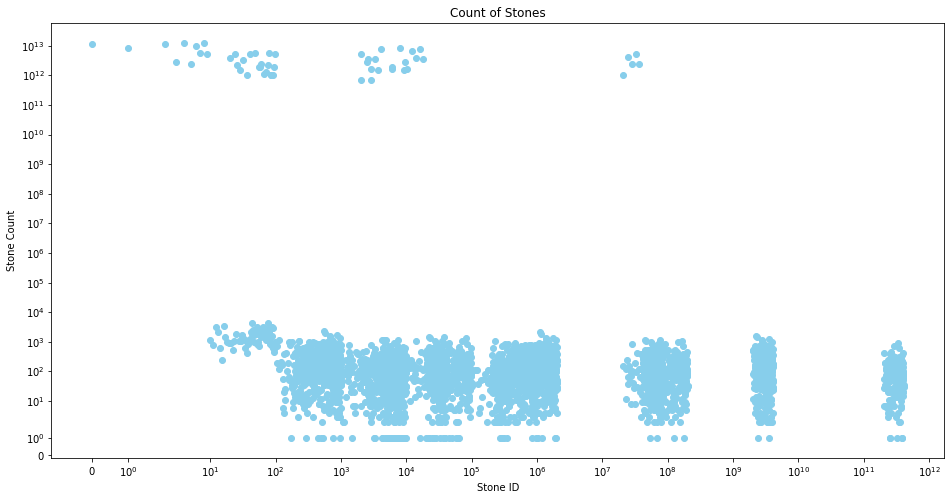

In [120]:
ll.plot()

In [121]:
#due to not keeping duplicates the length of the counter is now more managable, the so called "Lanternfish method"
print(ll)

Counter({4: 12396059889148, 8: 12100836065243, 2: 11685087242667, 0: 11325653474562, 6: 9838105963223, 8096: 8152822990239, 1: 8118422227864, 16192: 7958336870610, 4048: 7694086820392, 12144: 6465479371478, 80: 5820669152875, 7: 5742816281523, 48: 5513853012558, 9: 5427338437387, 96: 5365175067649, 24: 5364440757967, 2024: 5345381310148, 32772608: 5239065213058, 40: 5058358927405, 24579456: 4256027842530, 20: 3977703808471, 14168: 3776594990204, 18216: 3565164684930, 2608: 3453901071367, 3277: 3453901071360, 32: 3344562991456, 3: 2878328385873, 2457: 2808551346536, 9456: 2808551346536, 28676032: 2483256275319, 5: 2433750174175, 36869184: 2349063570800, 60: 2320031578066, 77: 2268968527089, 26: 2268968526431, 6072: 1893502258561, 56: 1842231037333, 94: 1842231035208, 57: 1842231035070, 6032: 1640398229533, 2867: 1640398229431, 10120: 1600550898582, 3686: 1548568633831, 9184: 1548568633831, 28: 1531088551633, 72: 1244437116285, 67: 1075594463869, 20482880: 1051474347931, 36: 101631839308